# Movie Rating Prediction with Python

**Author:** Dhananjay Pant  
**Domain:** Data Science  
**Date:** June 2024

## Data Collection

In [13]:
import pandas as pd

# Load the dataset
file_path = r"C:\Users\jaypa\Desktop\CODSOFT\creditcard.csv"
file = pd.read_csv(file_path)

# Display the first few rows of the dataset
file.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


## Data Preprocessing

In [14]:
# Check for missing values
file.isnull().sum()

# Display value counts of the target variable
file['Class'].value_counts()

# Split the dataset into normal and fraudulent transactions
normal = file[file.Class == 0]
fraud = file[file.Class == 1]

print(normal.shape)
print(fraud.shape)

# Describe the 'Amount' feature for normal and fraudulent transactions
normal.Amount.describe()
fraud.Amount.describe()

# Sample the normal transactions to balance the dataset
normal_sample = normal.sample(n=492)
new_file = pd.concat([normal_sample, fraud], axis=0)

# Display the first few rows of the balanced dataset
new_file.head(10)

# Display value counts of the target variable in the balanced dataset
new_file['Class'].value_counts()

# Display the mean of each feature grouped by the target variable
new_file.groupby('Class').mean()

# Split the dataset into features and target variable
X = new_file.drop(columns='Class', axis=1)
Y = new_file['Class']

(284315, 31)
(492, 31)


## Exploratory Data Analysis

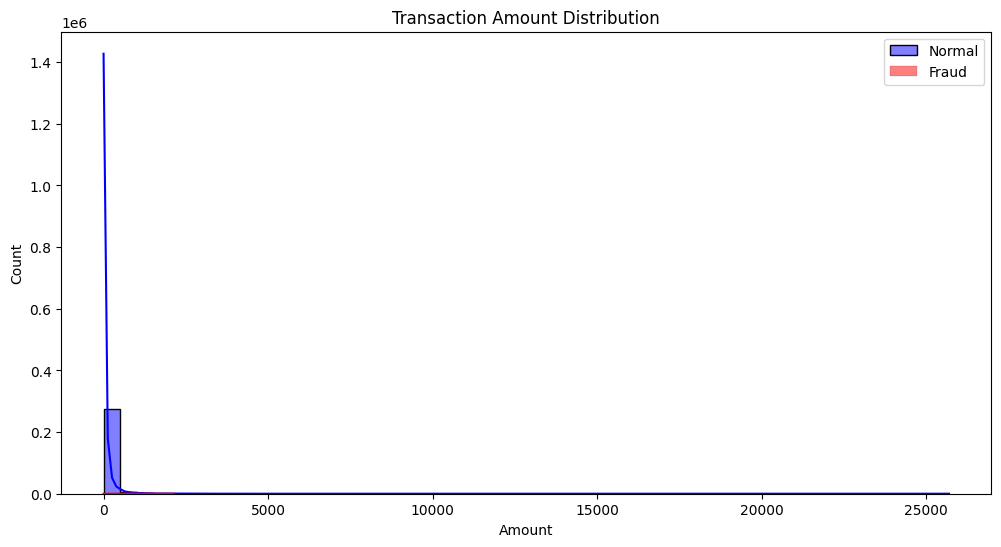

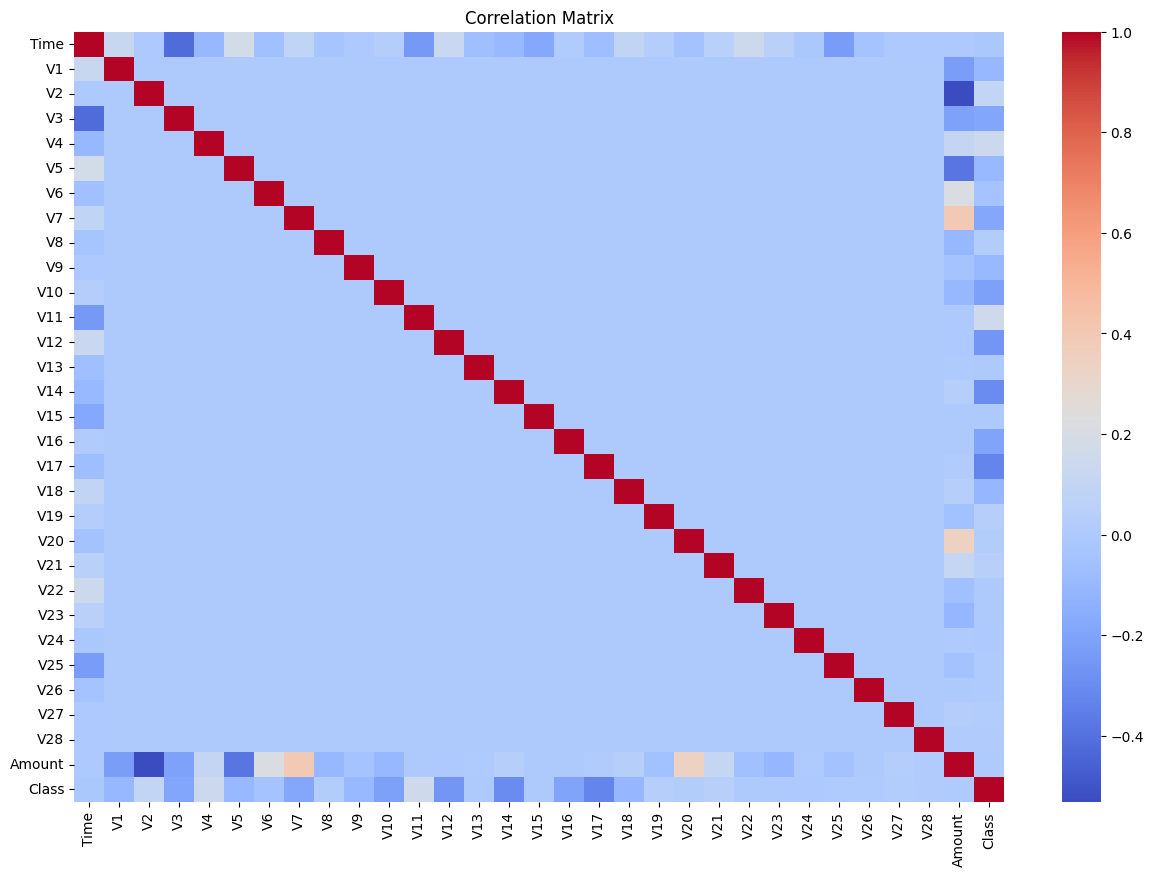

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize the distribution of the 'Amount' feature for normal and fraudulent transactions
plt.figure(figsize=(12, 6))
sns.histplot(normal['Amount'], bins=50, kde=True, color='blue', label='Normal')
sns.histplot(fraud['Amount'], bins=50, kde=True, color='red', label='Fraud')
plt.legend()
plt.title('Transaction Amount Distribution')
plt.show()

# Visualize the correlation matrix
plt.figure(figsize=(15, 10))
correlation_matrix = file.corr()
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


### Model Building

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# Split the data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the model with increased max_iter
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, Y_train)

# Predict and evaluate on training data
X_train_prediction = model.predict(X_train_scaled)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train) * 100
print(f"Training Data Accuracy: {training_data_accuracy}%")

# Predict and evaluate on testing data
X_test_prediction = model.predict(X_test_scaled)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test) * 100
print(f"Test Data Accuracy: {test_data_accuracy}%")


Training Data Accuracy: 95.80686149936467%
Test Data Accuracy: 92.38578680203045%
